# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campagn,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !


**Outline:**

    1. Importing all necessary libraries
    
    2. Loading data
    
    3. Data exploration and cleaning
    
    4. Data Visualization
    
    5. Conclusion
    

### Importing All Necessary Libraries

In [2]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

### Importing Data

In [3]:
data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

### Exploratory Data Analysis

In [4]:
data.shape

(51290, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

From the output above, Postal Code is having over 40,000 missing values hence may be dropped.

### Splitting the data into categorical and numerical variables

This is done to make it easier to understand and clean the data.

In [7]:
numerical = data.select_dtypes(include= np.number)
categorical = data.select_dtypes(include = 'object')

In [8]:
numerical.head()    #first 5 records of the numerical variables

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,42433,NaN,408.300,2,0.0,106.140,35.46
1,22253,NaN,120.366,3,0.1,36.036,9.72
2,48883,NaN,66.120,4,0.0,29.640,8.17
3,11731,NaN,44.865,3,0.5,-26.055,4.82
4,22255,NaN,113.670,5,0.1,37.770,4.70


In [9]:
numerical.drop('Postal Code', axis=1, inplace=True)  

In [10]:
numerical.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,42433,408.300,2,0.0,106.140,35.46
1,22253,120.366,3,0.1,36.036,9.72
2,48883,66.120,4,0.0,29.640,8.17
3,11731,44.865,3,0.5,-26.055,4.82
4,22255,113.670,5,0.1,37.770,4.70


<AxesSubplot:>

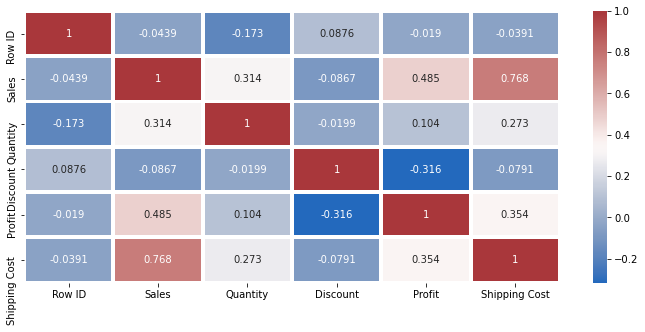

In [11]:
corrMatrix=numerical.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data=corrMatrix,annot=True,fmt='.3g',linewidths=3, cmap = 'vlag') 

In [12]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [13]:
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [14]:
categorical.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,AG-2011-2040,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium
1,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium
2,HU-2011-1220,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High
3,IT-2011-3647632,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High
4,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium


### Feature Engineering

In [15]:
import datetime
#splitting the order date into year, month, day of Order
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month_name()
data['Day'] = data['Order Date'].dt.day_name()

#finding the difference between Order date and Ship date 
data['Order Delay'] = data['Ship Date'] - data['Order Date']

#splitting the Ship date in year, month and day
data['Year_Ship'] = data['Ship Date'].dt.year
data['Month_Ship'] = data['Ship Date'].dt.month_name()
data['Day_Ship'] = data['Ship Date'].dt.day_name()

In [16]:
#calculating the unit price

data['Price'] = data['Sales']/data['Quantity']

In [17]:
#calculating the sales after discount by subtracting the discount from sales(quantity*price)
data['Sales AfterDiscount'] = data['Quantity'] * data['Price'] * (1-data['Discount'])

In [18]:
#maximum sales and profit per market
data.groupby('Market')['Sales', 'Profit'].max().sort_values(['Sales', 'Profit'], ascending = False)

,Sales,Profit
Market,,
US,22638.48,8399.976
EU,7958.58,3979.080
APAC,6998.64,2939.310
Africa,5301.24,2597.280
EMEA,5211.12,1622.880
Canada,3863.88,1159.020
LATAM,3474.08,1313.280


In [19]:
data.groupby('Market')['Sales', 'Profit'].min() #minimum sales and profit per

,Sales,Profit
Market,,
APAC,2.880,-3009.435
Africa,1.161,-1576.824
Canada,3.990,0.000
EMEA,1.440,-4088.376
EU,2.955,-3059.820
LATAM,1.566,-1806.240
US,0.444,-6599.978


In [20]:
category_most_sales = data.pivot_table(values = 'Sales', index = 'Product Name', columns = 'Category')
category_most_sales.max().sort_values(ascending = False) #the product category that brings the most sales

Category
Technology         22638.480000
Office Supplies     5676.770667
Furniture           4021.044000
dtype: float64

In [21]:
category_most_profit = data.pivot_table(values = 'Profit', index = 'Product Name', columns = 'Category')
category_most_profit.max().sort_values(ascending = False) #the product category that brings the most profit

Category
Technology         5039.985600
Office Supplies    1115.094100
Furniture           500.821077
dtype: float64

In [22]:
#dominant product category in each market
dominant_prod_cat = data.pivot_table(values = 'Sales', index = 'Category', columns = 'Market')

dominant_prod_cat.sort_values('Category', ascending = False)

Market,APAC,Africa,Canada,EMEA,EU,LATAM,US
Category,,,,,,,
Technology,566.565203,353.860640,404.597077,312.738652,582.554444,384.738446,452.709276
Office Supplies,143.163321,87.604444,108.426282,83.920531,158.796027,96.199374,119.324101
Furniture,553.286978,308.479612,252.268571,296.910047,519.055996,340.877674,349.834887


In [23]:
dominant_prod_cat1 = data.pivot_table(values = 'Sales', index = 'Market', columns = 'Category')

dominant_prod_cat1.sort_values('Market', ascending = False)

Category,Furniture,Office Supplies,Technology
Market,,,
US,349.834887,119.324101,452.709276
LATAM,340.877674,96.199374,384.738446
EU,519.055996,158.796027,582.554444
EMEA,296.910047,83.920531,312.738652
Canada,252.268571,108.426282,404.597077
Africa,308.479612,87.604444,353.860640
APAC,553.286978,143.163321,566.565203


In [24]:
customer_total_purchase = data.pivot_table(values = {'Sales AfterDiscount': 'sum'}, 
                                           index = ['Customer ID', 'Customer Name'], 
                                           columns = 'Category')

In [25]:
customer_total_purchase.head() 

Sales AfterDiscount                            
Category                            Furniture Office Supplies  Technology
Customer ID Customer Name                                                
AA-10315    Alex Avila             641.128967      221.645122  279.049368
AA-10375    Allen Armold           121.309518      113.585985  215.676100
AA-10480    Andrew Allen           458.339867      160.175558  984.834825
AA-10645    Anna Andreadi          448.750308       95.684367  274.856530
AA-315      Alex Avila              58.545600       97.784160  796.620000

In [26]:
more_sales_year = data.groupby('Year')['Sales'].max().sort_values(ascending = False)
more_sales_year       #month and year the company records more sales

Year
2011    22638.48
2013    17499.95
2014    13999.96
2012     6354.95
Name: Sales, dtype: float64

In [27]:
more_sales_month = data.groupby('Month')['Sales'].max().sort_values(ascending = False)
more_sales_month       #month the company records more sales

Month
March        22638.480
October      11199.968
November     10499.970
December      9892.740
September     9449.950
April         9099.930
February      8749.950
May           8399.976
July          8187.650
August        8159.952
June          5486.670
January       5451.300
Name: Sales, dtype: float64

In [28]:
more_sales_month_year = data.groupby(['Year', 'Month'])['Sales'].max().sort_values(ascending = False)
more_sales_month_year       #month and year the company records more sales

Year  Month    
2011  March        22638.4800
2013  March        17499.9500
2014  March        13999.9600
      October      11199.9680
      November     10499.9700
2013  December      9892.7400
2011  September     9449.9500
2013  April         9099.9300
      February      8749.9500
      May           8399.9760
2011  July          8187.6500
      August        8159.9520
2014  May           7999.9800
      August        7958.5800
2011  December      6999.9600
      October       6998.6400
2012  March         6354.9500
      December      5785.0200
      February      5759.9640
      August        5737.5000
2011  November      5725.3500
2012  May           5724.5400
2014  September     5667.8700
      June          5486.6700
2013  January       5451.3000
2014  January       5443.9600
2012  April         5244.8400
2013  July          5211.1200
      October       5175.1710
2014  December      4864.3200
      February      4799.9840
2013  November      4618.2150
2011  February      4544

In [29]:
more_sales_month_year = pd.DataFrame(more_sales_month_year)

In [30]:
more_profit_year = data.groupby('Year')['Profit'].max().sort_values(ascending = False)
more_profit_year 

Year
2013    8399.9760
2014    6719.9808
2011    4630.4755
2012    3177.4750
Name: Profit, dtype: float64

In [31]:
more_profit_month = data.groupby('Month')['Profit'].max().sort_values(ascending = False)
more_profit_month 

Month
March        8399.9760
November     5039.9856
December     4946.3700
September    4630.4755
August       3979.0800
October      3919.9888
February     2799.9840
May          2591.9568
January      2504.2216
April        2365.9818
June         2316.5100
July         1644.0300
Name: Profit, dtype: float64

In [32]:
more_profit_month_year = data.groupby(['Month', 'Year'])['Profit'].max().sort_values(ascending = False)
more_profit_month_year 

Month      Year
March      2013    8399.9760
           2014    6719.9808
November   2014    5039.9856
December   2013    4946.3700
September  2011    4630.4755
August     2014    3979.0800
October    2014    3919.9888
March      2012    3177.4750
October    2011    2939.3100
February   2013    2799.9840
May        2013    2591.9568
January    2014    2504.2216
August     2011    2476.4400
May        2012    2461.3200
April      2013    2365.9818
June       2014    2316.5100
December   2012    2302.9671
           2011    2239.9872
August     2012    2229.0240
September  2014    2097.0300
January    2013    2071.4400
April      2011    1995.9900
August     2013    1989.5400
January    2012    1989.5400
April      2012    1906.4850
February   2011    1868.1300
October    2013    1644.2913
July       2011    1644.0300
June       2011    1622.8800
November   2011    1602.9900
April      2014    1563.4800
May        2011    1517.7120
November   2013    1470.2100
July       2013    1465.200

In [33]:
more_profit_month_year = pd.DataFrame(more_profit_month_year)
more_profit_month_year

Profit
Month     Year           
March     2013  8399.9760
          2014  6719.9808
November  2014  5039.9856
December  2013  4946.3700
September 2011  4630.4755
August    2014  3979.0800
October   2014  3919.9888
March     2012  3177.4750
October   2011  2939.3100
February  2013  2799.9840
May       2013  2591.9568
January   2014  2504.2216
August    2011  2476.4400
May       2012  2461.3200
April     2013  2365.9818
June      2014  2316.5100
December  2012  2302.9671
          2011  2239.9872
August    2012  2229.0240
September 2014  2097.0300
January   2013  2071.4400
April     2011  1995.9900
August    2013  1989.5400
January   2012  1989.5400
April     2012  1906.4850
February  2011  1868.1300
October   2013  1644.2913
July      2011  1644.0300
June      2011  1622.8800
November  2011  1602.9900
April     2014  1563.4800
May       2011  1517.7120
November  2013  1470.2100
July      2013  1465.2000
          2014  1440.2400
December  2014  1439.4480
May       2014  1423.4400
June      2013  1383.9000
March     2011  1364.2380
February  2012  1270.9900
October   2012  1245.8400
June      2012  1143.8910
September 2012  1114.5120
July      2012  1112.1300
September 2013  1046.1600
February  2014   978.8400
November  2012   874.1670
January   2011   843.9900

In [34]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,Day,Order Delay,Year_Ship,Month_Ship,Day_Ship,Price,Sales AfterDiscount
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,January,Saturday,151 days,2011,June,Wednesday,204.150,408.3000
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,January,Saturday,212 days,2011,August,Monday,40.122,108.3294
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,January,Saturday,120 days,2011,May,Sunday,16.530,66.1200
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,January,Saturday,120 days,2011,May,Sunday,14.955,22.4325
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,January,Saturday,212 days,2011,August,Monday,22.734,102.3030


In [35]:
#City with most orders for a given product category
city_with_most_orders = data.groupby(['City', 'Category'])['Order ID'].count().sort_values(ascending = False)
city_with_most_orders.head(10)

City           Category       
New York City  Office Supplies    552
Los Angeles    Office Supplies    443
San Francisco  Office Supplies    322
Philadelphia   Office Supplies    312
Santo Domingo  Office Supplies    250
Seattle        Office Supplies    249
Houston        Office Supplies    231
Manila         Office Supplies    227
Lagos          Office Supplies    213
Tegucigalpa    Office Supplies    207
Name: Order ID, dtype: int64

In [36]:
#products making losses
prod_making_loss = data.groupby('Category')['Profit'].min().sort_values(ascending = False)
prod_making_loss

Category
Furniture         -2750.2800
Office Supplies   -3701.8928
Technology        -6599.9780
Name: Profit, dtype: float64

In [37]:
#segment making more profit
segment_making_more_profit = data.groupby('Segment')['Profit'].max().sort_values(ascending = False)
segment_making_more_profit

Segment
Corporate      8399.9760
Consumer       6719.9808
Home Office    3919.9888
Name: Profit, dtype: float64

In [38]:
# which order priority yields more sales
order_priority_more_sales = data.groupby('Order Priority')['Sales'].max().sort_values(ascending = False)
order_priority_more_sales

Order Priority
Medium      22638.480
High        11199.968
Critical     8749.950
Low          7958.580
Name: Sales, dtype: float64

In [39]:
order_priority_more_sales.index

Index(['Medium', 'High', 'Critical', 'Low'], dtype='object', name='Order Priority')

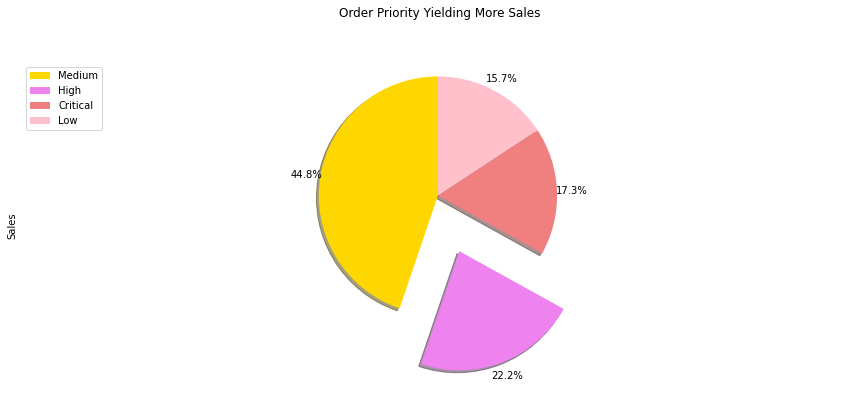

In [40]:
colors_list=['gold','violet','lightcoral','pink']
explode_list= [0,0.5,0,0]
order_priority_more_sales.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%',
                            startangle = 90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list) 
plt.title('Order Priority Yielding More Sales',y=1.12)
plt.axis('equal')
plt.legend(labels=order_priority_more_sales.index, loc='upper left')
plt.show()

In [41]:
#What is the average shipping cost to each region?
avg_shipping_cost = data.groupby('Region')['Shipping Cost'].mean().sort_values(ascending = False)
avg_shipping_cost

Region
North Asia        40.646112
Central Asia      38.003003
Oceania           34.593780
Southeast Asia    29.937948
North             27.476299
Central           26.710494
East              25.542001
South             25.353509
West              23.887687
Caribbean         21.059260
Canada            19.285495
Africa            19.215058
EMEA              17.573221
Name: Shipping Cost, dtype: float64

In [42]:
# What product categories should be targetted to the  different markets?
prod_cat_mkt = data.groupby(['Category', 'Market'])['Sales'].max().sort_values(ascending = False)
prod_cat_mkt

Category         Market
Technology       US        22638.480
Office Supplies  US         9892.740
                 EU         7958.580
Technology       APAC       6998.640
                 EU         5785.020
Furniture        APAC       5759.964
                 EU         5729.346
Technology       Africa     5301.240
                 EMEA       5211.120
Office Supplies  APAC       4864.320
Furniture        EMEA       4486.860
                 US         4416.174
Office Supplies  EMEA       3955.140
Furniture        Africa     3877.680
Technology       Canada     3863.880
                 LATAM      3474.080
Furniture        LATAM      3473.140
Office Supplies  Africa     3409.740
                 LATAM      3242.880
                 Canada     1799.100
Furniture        Canada     1758.000
Name: Sales, dtype: float64

In [43]:
# Does the interval between the order date and the shipping date affect sale and profit?
order_delay_sales_profit = data.groupby('Order Delay')['Sales', 'Profit'].max().sort_values(['Sales', 'Profit'],
                                                                                            ascending = [False, False])
order_delay_sales_profit

,Sales,Profit
Order Delay,,
5 days,22638.48,5039.9856
214 days,17499.95,8399.9760
2 days,13999.96,6719.9808
4 days,9892.74,4946.3700
59 days,8749.95,2799.9840
...,...,...
-264 days,238.65,53.4900
-294 days,96.90,9.8700
-206 days,37.59,17.6673


### Descriptive Statistics

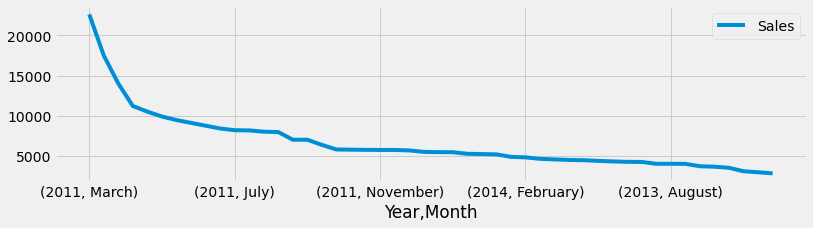

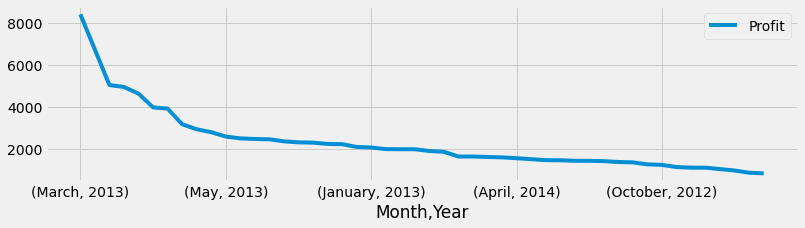

In [44]:
style.use('fivethirtyeight')
more_sales_month_year.plot.line(figsize=(12,3),)
more_profit_month_year.plot.line(figsize=(12,3),);

The plots above shows that the highest sales was made in March 2011 while the highest profit was made in March 2013.

#### Relationship between Discount and Sales

#### Plot of Sales by Market

<AxesSubplot:ylabel='Market'>

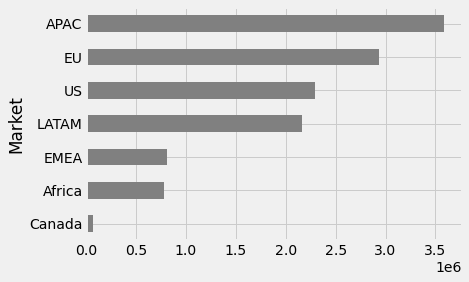

In [45]:
#bar chart of the different market sales
data.groupby('Market')['Sales'].sum().sort_values().\
plot.barh(color='gray')

<AxesSubplot:ylabel='Market'>

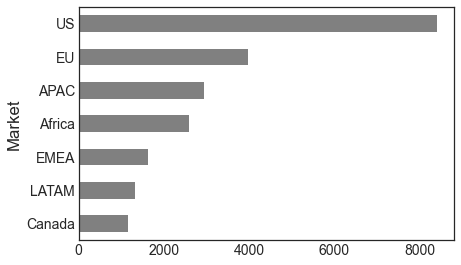

In [51]:
#bar chart of the different market sales
data.groupby('Market')['Profit'].max().sort_values().\
plot.barh(color='gray')

#### Dorminant Product Category Per Market

<AxesSubplot:xlabel='Market'>

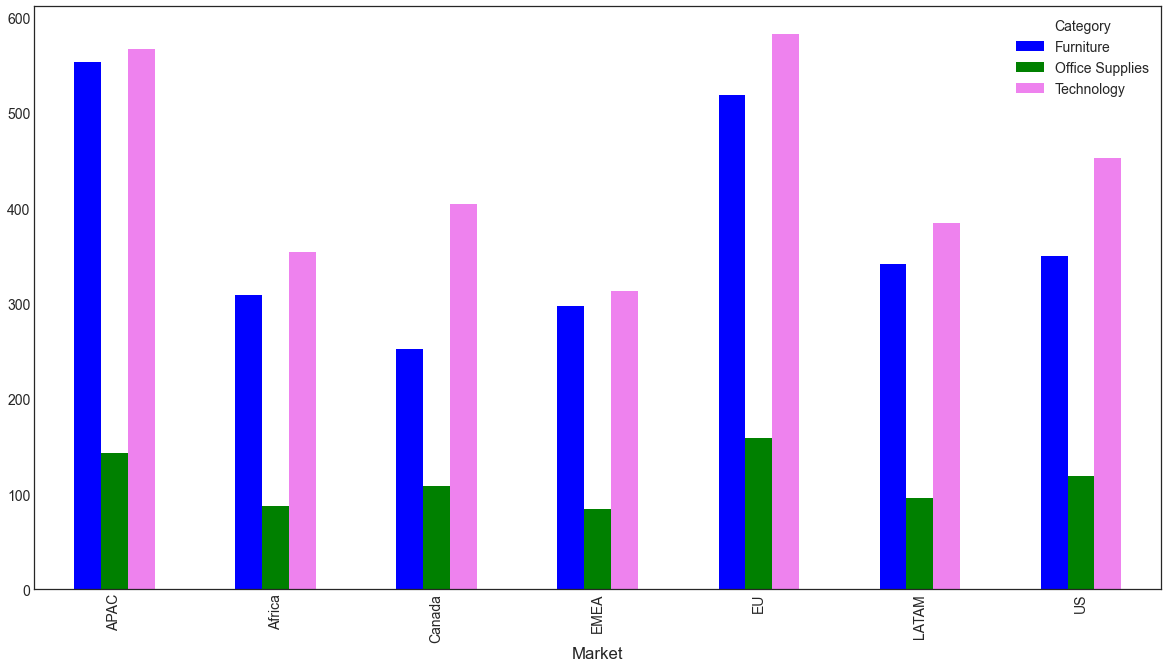

In [47]:
style.use('seaborn-white')
dominant_prod_cat1.plot.bar(color={"Furniture": "Blue", "Office Supplies": "green", "Technology": "Violet"}, figsize = (18,10))